In [209]:
#using a tree-based feature reduction algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

DATAPATH='/Users/anca/Downloads/Hack-H-er413-master 2/model/full_random_sample.csv'
df=pd.read_csv(DATAPATH)
df_majority=df[df['hospital_death']==0]
df_minority=df[df['hospital_death']==1]

df_majority_downsampled = df_majority.sample(replace=False,    # sample without replacement
                                             n=df_minority.shape[0],
                                             random_state=0)     # to match minority class    #reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
working_df=df_downsampled




In [210]:
y=working_df.pop('hospital_death')
length_partial=working_df.shape[0]
working_df.pop('apache_4a_hospital_death_prob')
#doctor_pred_partial=working_df.pop('apache_4a_icu_death_prob')
#doctor_pred_partial=(doctor_pred_partial>0.5)*np.ones(length_partial)
X=working_df
#y=y.to_numpy()
#X=X.to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#y_doctor_test_balanced=doctor_pred_partial.sample(replace=False, n=3000, random_state=0)
#y_doctor_pred_balanced=y.sample(replace=False, n=3000, random_state=0)

In [211]:
#IDENTIFYING IMPORTANT FEATURES

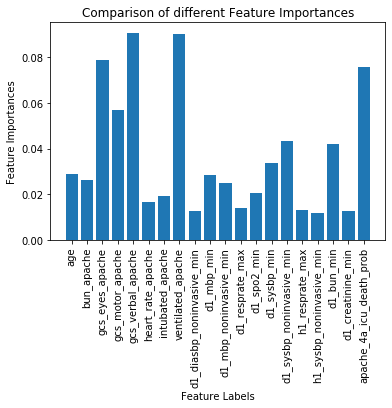

Index(['age', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'ventilated_apache', 'd1_mbp_min', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_min', 'd1_bun_min', 'apache_4a_icu_death_prob'],
      dtype='object')
Index(['age', 'bun_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'ventilated_apache', 'd1_diasbp_noninvasive_min', 'd1_mbp_min',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_min',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'h1_resprate_max',
       'h1_sysbp_noninvasive_min', 'd1_bun_min', 'd1_creatinine_min',
       'apache_4a_icu_death_prob'],
      dtype='object')


In [212]:
#df=df.to_numpy()
#need to insert dataset below
#X=X.to_numpy()
#y=y.to_numpy()
#X.shape

#GET IMPORTANT FEATURES
#clf=classifier :))#

clf = ExtraTreesClassifier(n_estimators=50, min_samples_leaf=10, max_features=20)
#n_estimtors = number of trees in forest
#min_samples_split= minumum number before node splitting in tree, maybe 5
#min_samples_leaf
#max_features
clf = clf.fit(X_train, y_train)

clf.feature_importances_ 

#print(clf.feature_importances_ )
copy_importances=np.sort(clf.feature_importances_)
copy_importances=np.flip(copy_importances)
#print(copy_importances)
#Get the 10th and 20th most important features
no_10=copy_importances[9]
no_20=copy_importances[19]
first_10=clf.feature_importances_[clf.feature_importances_>=no_10]
relevant_columns_10=X.columns[clf.feature_importances_>=no_10]

first_20=clf.feature_importances_[clf.feature_importances_>=no_20]
relevant_columns_20=X.columns[clf.feature_importances_>=no_20]

#print(sum(first_20))~ first 20 amount to 74% of cumulative Gini importance
#Plot importance scores
#plt.bar(X.columns, clf.feature_importances_ ) 
#plt.xlabel('Feature Labels') 
#plt.ylabel('Feature Importances') 
#plt.xticks(rotation='vertical')
#plt.title('Comparison of different Feature Importances') 
#plt.show() 
plt.bar(relevant_columns_20, first_20 ) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.xticks(rotation='vertical')
plt.title('Comparison of different Feature Importances') 
plt.show() 
print(relevant_columns_10)
print(relevant_columns_20)

In [213]:
#Test models (us and doctor) on EVEN data (balanced classes)
model = SelectFromModel(clf, prefit=True)

y_pred=clf.predict(X_test)
#print(y_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy doctor balanced:",metrics.accuracy_score(y_doctor_test_balanced, y_doctor_pred_balanced))
#from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix
#binary1 = confusion_matrix(y_test, y_pred)
#binary2 = confusion_matrix(y_doctor_test_balanced, y_doctor_pred_balanced)
#fig, ax = plot_confusion_matrix(conf_mat=binary1)
#plt.show()
#fig, ax = plot_confusion_matrix(conf_mat=binary2)
#plt.show()
#print(df.head())
y=df.pop('hospital_death')


Accuracy: 0.7852179406190777
Accuracy doctor balanced: 0.584


In [202]:
#Test model on all data
#print(df.head())
#y=df.pop('hospital_death')
df.pop('apache_4a_hospital_death_prob')
#doctor_pred=df.pop('apache_4a_icu_death_prob')

#getting predictions for doctors, if doctors predicted with threshold 0.5
#length=df.shape[0]
#ones=np.ones(length)
#doctor_pred=ones*(doctor_pred>0.5)
X=df
print('y length=',y.shape[0])
print('X length=',X.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred=clf.predict(X_test)

#getting doctor predictions
#y_doctor_pred=doctor_pred.sample(replace=False, n=18000, random_state=0)
#y_test_doctor=y.sample(replace=False, n=18000,random_state=0)
#print(y_pred)
#print(y_test_doctor)
#print(y_doctor_pred)


from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy_doctor:",metrics.accuracy_score(y_test_doctor, y_doctor_pred))

    age  albumin_apache  bun_apache  fio2_apache  gcs_eyes_apache  \
0  68.0             2.3        31.0          1.0                2   
1  77.0             3.5         9.0          1.0                0   
2  25.0             2.3         9.0          0.3                2   
3  81.0             2.8        12.0          0.6                3   
4  19.0             3.3        40.0          1.0               -1   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  \
0                 5                  0                  3              118.0   
1                 2                  0                  0              120.0   
2                 5                  0                  4              102.0   
3                 5                  0                  4              114.0   
4                -1                 -1                 -1               60.0   

   intubated_apache  ...  h1_pao2fio2ratio_min  apache_4a_hospital_death_prob  \
0                 0  ..

[[1237  331]
 [ 349 1249]]


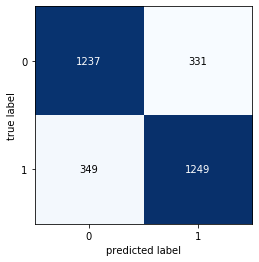

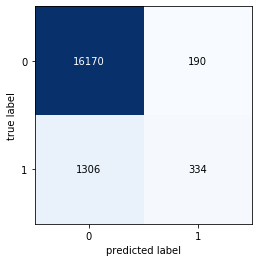

In [214]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from mlxtend.plotting import plot_confusion_matrix
binary1 = confusion_matrix(y_test, y_pred)
binary2 = confusion_matrix(y_test_doctor, y_doctor_pred)
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()
fig, ax = plot_confusion_matrix(conf_mat=binary2)
plt.show()

In [220]:
#PREDICTIONS: DEATH or LIVE
#or PROBABILITY of DEATH
#X_test is the original, 85 column DataFrame

y_pred=clf.predict(X_test)
y_death_probability_prediction=clf.predict_proba(X_test)
print(y_pred)
print(y_death_probability_prediction)


[0 0 1 ... 1 1 0]
[[0.84493132 0.15506868]
 [0.54875799 0.45124201]
 [0.0266034  0.9733966 ]
 ...
 [0.06444067 0.93555933]
 [0.17194195 0.82805805]
 [0.92151097 0.07848903]]
        age  albumin_apache  bun_apache  fio2_apache  gcs_eyes_apache  \
21140  62.0             3.0         9.0          0.4                3   
48796  46.0             3.0        27.4          0.6                3   
41390  84.0             2.6        33.0          1.0                0   
84982  65.0             3.9        45.0          0.4                1   
22916  82.0             2.4        41.0          1.0                3   

       gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
21140                 5                  0                  4   
48796                 5                  0                  4   
41390                 0                  0                  0   
84982                 3                  0                  0   
22916                 5                  0                  3 

AttributeError: 'ExtraTreesClassifier' object has no attribute 'coef_'